In [82]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn import datasets
import matplotlib.pyplot as plt

In [49]:
iris = datasets.load_iris()

In [53]:
iris.DESCR.split("\n")

['Iris Plants Database',
 '====================',
 '',
 'Notes',
 '-----',
 'Data Set Characteristics:',
 '    :Number of Instances: 150 (50 in each of three classes)',
 '    :Number of Attributes: 4 numeric, predictive attributes and the class',
 '    :Attribute Information:',
 '        - sepal length in cm',
 '        - sepal width in cm',
 '        - petal length in cm',
 '        - petal width in cm',
 '        - class:',
 '                - Iris-Setosa',
 '                - Iris-Versicolour',
 '                - Iris-Virginica',
 '    :Summary Statistics:',
 '',
 '    ============== ==== ==== ======= ===== ====================',
 '                    Min  Max   Mean    SD   Class Correlation',
 '    ============== ==== ==== ======= ===== ====================',
 '    sepal length:   4.3  7.9   5.84   0.83    0.7826',
 '    sepal width:    2.0  4.4   3.05   0.43   -0.4194',
 '    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)',
 '    petal width:    0.1  2.5   1.20  0.76 

In [54]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [55]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [56]:
X = iris.data
y = iris.target

### Using k = 1

In [57]:
knn = KNeighborsClassifier(n_neighbors= 1)

In [58]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [59]:
knn.predict([[3,4,5,6],[4,2,3,5]])

array([2, 2])

This means that when the data provided is [3,4,5,6] and [4,2,3,5], we have flowers as virginica

### Choosing Different Values of k i.e. k =5

In [101]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X,y)
knn.predict([[3,4,5,6],[4,2,3,5]])

array([2, 2])

Even if we are choosing k=5, we are getting same ans.

### Choosing a different model

In [60]:
log_reg = LogisticRegression()
log_reg.fit(X,y)
log_reg.predict([[3,4,5,6],[4,2,3,5]])

array([2, 2])

### Train_test_split() and then checking suitable model

In [61]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4, random_state = 4)

In [62]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(90, 4)
(60, 4)
(90,)
(60,)


### Fitting model at k=1

In [63]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_predict = knn.predict(X_test)

Checking accuracy score of predicted value

In [64]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))

0.95


### Fitting Model at k=5

In [65]:
knn.n_neighbors = 5
knn.fit(X_train,y_train)
y_predict = knn.predict(X_test)
print(accuracy_score(y_test,y_predict))

0.966666666667


### Comparing Results with Logistics Regression Model

In [66]:
log_reg.fit(X_train,y_train)
y_predict = log_reg.predict(X_test)
print(accuracy_score(y_test,y_predict))

0.95


##### So from above, we can conclude that for the given dataset, we are getting the best accuracy with Knn model at k =5

##### Can we find even better value of k?

In [67]:
scores = []
for k in range(1,26):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_predict = knn.predict(X_test)
    score = sklearn.metrics.accuracy_score(y_test,y_predict)
    scores.append(score)
print(scores)

[0.94999999999999996, 0.94999999999999996, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.96666666666666667, 0.98333333333333328, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.94999999999999996, 0.94999999999999996]


In [57]:
# we can check for maximum accuray score
max(score)

0.98333333333333328

### plot the scores as per different values of k using Matplotlib

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
k_range = list(range(1,26))

Text(0,0.5,'Accuracy Scores')

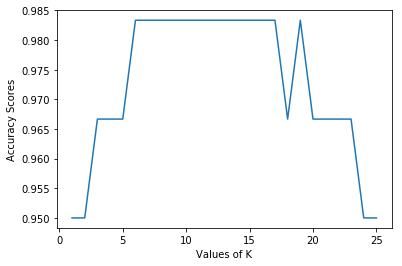

In [66]:
plt.figure()
plt.plot(k_range,score)
plt.xlabel("Values of K")
plt.ylabel("Accuracy Scores")

Lower is the value of k means the model is complex. As model complexity reduces, (i.e. k increases), the accuracy_scores increase. **Given same level of accuracy scores, we choose the model which is lesser complex (i.e. the one which has higher value of k).** 

**Lower values of k are associated with problem of overfitting in the model**

Lower k = more complex

#### In above, k = 19 has highest accuracy score and minimum model complexity

### Limitations of Using train_test split

Provides a high-variance estimate of out-of-sample accuracy

K-fold cross-validation overcomes this limitation

But, train/test split is still useful because of its flexibility and speed



**In train_test_split, if we change the observations which are in Training dataset and which are in testing dataset, our model
accuracy changes. i.e. Just with change in Random_state parameter, the results change.**

* We can instead do some train_test splits, and then record the accuracy each time and then avg that up to see the accuracy & that is what the K-fold Cross validation does.

## Steps for K-fold cross-validation

1. Split the dataset into K **equal** partitions (or "folds").
2. Use fold 1 as the **testing set** and the union of the other folds as the **training set**.
3. Calculate **testing accuracy**.
4. Repeat steps 2 and 3 K times, using a **different fold** as the testing set each time.
5. Use the **average testing accuracy** as the estimate of out-of-sample accuracy.
- For each iteration, every observation is either in the training set or the testing set, **but not both**
- Every observation is in the testing set **exactly once**

**Note : Each Observation is only once each in training and testing dataset and there's never an overlap. In fact, K-fold cross
Validation uses Stratified sampling in the backened for splitting the data.**

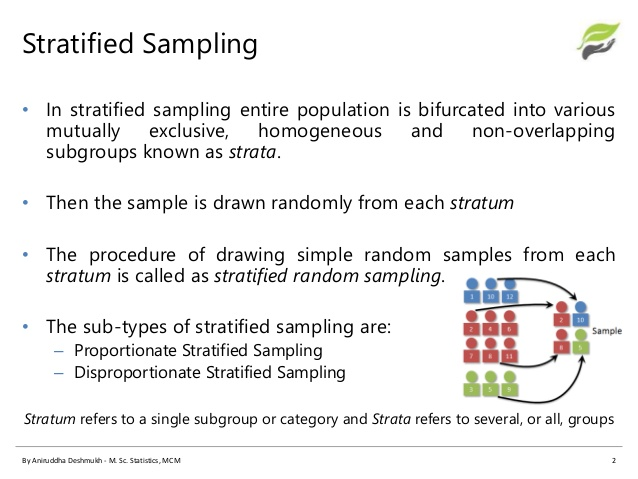

In [75]:
from IPython import display
display.Image("stratified.jpg")

## Cross-validation recommendations

1. K can be any number, but **K=10** is generally recommended
2. For classification problems, **stratified sampling** is recommended for creating the folds
    - Each response class should be represented with equal proportions in each of the K folds
    - scikit-learn's `cross_val_score` function does this by default

# Choosing the best Tuning parameter (i.e. Here "K" i.e. n_neighbors of Knn Classifier)

### Using cross_val_score instead of train_test_split on the iris dataset for prediction using KNN and Logistic Reg

In [76]:
X = iris.data
y = iris.target

In [77]:
knn = KNeighborsClassifier(n_neighbors=5)
score = sklearn.cross_validation.cross_val_score(knn,X,y,scoring= "accuracy", cv = 10)
print(score)
print(score.mean())

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]
0.966666666667


In [80]:
mean_accu_score = []
k_range = list(range(1,26))
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    score = sklearn.cross_validation.cross_val_score(knn,X,y,scoring = "accuracy", cv = 10)
    mean_accu_score.append(score.mean())
print(mean_accu_score)

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656]


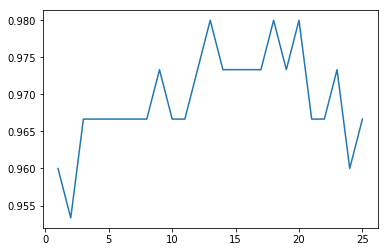

In [83]:
plt.plot(k_range,mean_accu_score)

In [84]:
max(mean_accu_score)

0.98000000000000009

In [188]:
# Here for checking the best value of k, we have to use "For" loop. we can instead use GridSearchCV and we won't need to use
# for loop

# Using GridSearchCV with knn Classifier on Iris Dataset

benefits :
1. It reduces need of applying for loop
2. we can check the model for muliptple values of more than one parameter. for eg : in addition to "n_neighbors", we can use "weights" etc.

In [85]:
param = dict(n_neighbors = k_range)

In [86]:
knn = KNeighborsClassifier(n_neighbors=19)
from sklearn.grid_search import GridSearchCV
grid = GridSearchCV(knn,param_grid= param, scoring = "accuracy", cv = 10)
grid.fit(X,y)

C:\Users\Urvashi\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=19, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [87]:
grid.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 7},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 8},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 9},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 11},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 12},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 13},
 mean: 0.97333, std: 0.04422, params: {'n_neighbors': 14},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 15},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 16},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 17},
 mean:

In [88]:
print(grid.grid_scores_[0])
print(grid.grid_scores_[0].mean_validation_score)

mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1}
0.96


In [89]:
print(grid.best_estimator_)
print(grid.best_params_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')
{'n_neighbors': 13}


In [194]:
# So when we use k = 13, we get the best result

In [201]:
mean_grid = [i.mean_validation_score for i in grid.grid_scores_ ]
mean_grid

[0.96,
 0.9533333333333334,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9733333333333334,
 0.9666666666666667,
 0.9666666666666667,
 0.9733333333333334,
 0.98,
 0.9733333333333334,
 0.9733333333333334,
 0.9733333333333334,
 0.9733333333333334,
 0.98,
 0.9733333333333334,
 0.98,
 0.9666666666666667,
 0.9666666666666667,
 0.9733333333333334,
 0.96,
 0.9666666666666667]

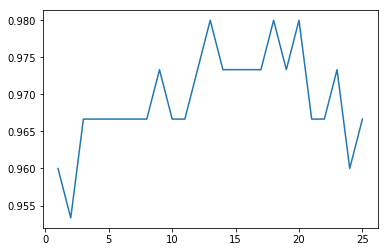

In [202]:
plt.plot(k_range,mean_grid)

#### Predicting out of sample data using best parameters

In [218]:
#method1 : grid will automatically best model using all data
grid.predict([[3,4,5,1], [2,3,5,4]])

array([1, 2])

In [222]:
#method2 - using the Knn Classifier with best parameters
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X,y)
knn.predict([[3,4,5,1], [2,3,5,4]])

array([1, 2])

### Selecting "accuracy" as another parameter to check the best model

In [281]:
k_range = list(range(1,26))
weight_options = ["uniform", "distance"]
param = dict(n_neighbors = k_range,weights = weight_options)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param, scoring= "accuracy", cv = 10)
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [226]:
grid.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'uniform'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'distance'},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2, 'weights': 'uniform'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 2, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, para

In [227]:
print(grid.best_estimator_)
print(grid.best_params_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')
{'n_neighbors': 13, 'weights': 'uniform'}


In [228]:
mean_score = [i.mean_validation_score for i in grid.grid_scores_]
mean_score

[0.96,
 0.96,
 0.9533333333333334,
 0.96,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9733333333333334,
 0.9733333333333334,
 0.9666666666666667,
 0.9733333333333334,
 0.9666666666666667,
 0.9733333333333334,
 0.9733333333333334,
 0.9733333333333334,
 0.98,
 0.9733333333333334,
 0.9733333333333334,
 0.9733333333333334,
 0.9733333333333334,
 0.98,
 0.9733333333333334,
 0.9733333333333334,
 0.9733333333333334,
 0.98,
 0.98,
 0.9733333333333334,
 0.9733333333333334,
 0.98,
 0.98,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9733333333333334,
 0.9733333333333334,
 0.96,
 0.9733333333333334,
 0.9666666666666667,
 0.9733333333333334]

In [248]:
# we need to plot 2 lines in one diagram - one having means of "uniform" weights and other with "distance" as weights
mean_uniform = mean_score[::2]
mean_distance = mean_score[1::2]

Text(0,0.5,'Mean Scores')

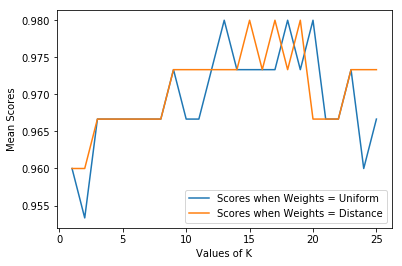

In [259]:
plt.plot(k_range,mean_uniform, label = "Scores when Weights = Uniform")
plt.plot(k_range,mean_distance, label = "Scores when Weights = Distance")
plt.legend()
plt.xlabel("Values of K")
plt.ylabel("Mean Scores")

As we know that low k ->> higher model complexity. So we need to choose a mid value of "k" , here which is k= 20 and weights = uniform. when we used grid to check the best parameters, it gave us k = 13 bcoz, it just looked at higher scores and gave the first result it found

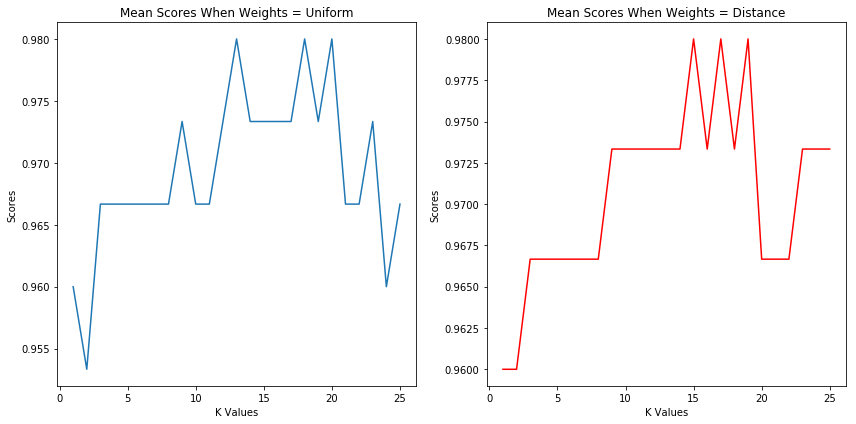

In [274]:
# if want to plot in 2 separate plots

fig,axes = plt.subplots(nrows = 1, ncols =2, figsize = (12,6))
axes[0].plot(k_range,mean_uniform,)
axes[0].set_xlabel("K Values")
axes[0].set_ylabel("Scores")
axes[0].set_title("Mean Scores When Weights = Uniform")

axes[1].plot(k_range,mean_distance, color = "red")
axes[1].set_xlabel("K Values")
axes[1].set_ylabel("Scores")
axes[1].set_title("Mean Scores When Weights = Distance")

plt.tight_layout()

#### Predicting Out of Sample Values using GridSearchCV

In [276]:
#Method1
grid.predict([[3,5,4,6],[2,5,6,4]])

array([2, 2])

In [277]:
#method2
knn = KNeighborsClassifier(n_neighbors= 20, weights= "uniform")
knn.fit(X,y)
knn.predict([[3,5,4,6],[2,5,6,4]])

array([2, 2])

# A method similar to GridSearchCV is RandomSearchCV

RandomSearchCV gives Random values using GridSearchCV

In [280]:
k_range = list(range(1,26))
weight_options = ["uniform", "distance"]
param = dict(n_neighbors = k_range, weights = weight_options)
knn = KNeighborsClassifier()
from sklearn.grid_search import RandomizedSearchCV
rand = RandomizedSearchCV(knn,param_distributions= param, n_iter= 20, scoring="accuracy", cv = 10)
rand.fit(X,y)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params={}, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 'weights': ['uniform', 'distance']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring='accuracy', verbose=0)

In [282]:
rand.grid_scores_

[mean: 0.96667, std: 0.04472, params: {'weights': 'uniform', 'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'weights': 'uniform', 'n_neighbors': 7},
 mean: 0.98000, std: 0.03055, params: {'weights': 'distance', 'n_neighbors': 17},
 mean: 0.97333, std: 0.03266, params: {'weights': 'uniform', 'n_neighbors': 15},
 mean: 0.96667, std: 0.04472, params: {'weights': 'uniform', 'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'weights': 'distance', 'n_neighbors': 4},
 mean: 0.97333, std: 0.03266, params: {'weights': 'distance', 'n_neighbors': 18},
 mean: 0.96667, std: 0.04472, params: {'weights': 'uniform', 'n_neighbors': 8},
 mean: 0.96667, std: 0.04472, params: {'weights': 'uniform', 'n_neighbors': 6},
 mean: 0.96667, std: 0.04472, params: {'weights': 'uniform', 'n_neighbors': 11},
 mean: 0.96000, std: 0.05333, params: {'weights': 'distance', 'n_neighbors': 2},
 mean: 0.96667, std: 0.04472, params: {'weights': 'distance', 'n_neighbors': 21},
 mean: 0.97333, std: 0.03266,

In [286]:
# Examine the best model
print(rand.best_estimator_)
print(rand.best_params_)
print(rand.best_score_)

# Here we can notice that since RandomSearchCV gives only a subset of results from GridSearchCV, we get best k = 17, and
# weight = distance

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='distance')
{'weights': 'distance', 'n_neighbors': 17}
0.98


In [285]:
#Estimating Out of Sample data
#method1
rand.predict([[3,5,4,6],[2,5,6,4]])

array([2, 2])

In [287]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [288]:
#method2
knn = KNeighborsClassifier(n_neighbors= 17, weights= "distance")
knn.fit(X,y)
knn.predict([[3,5,4,6],[2,5,6,4]])

array([2, 2])